### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Sourcing of Data

In [2]:
bike_data = pd.read_csv("E:\\Master of Science\\Linear Regression\\Multiple Linear Regression\\Bike Sharing\\day.csv")

In [3]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Shape of dataframe

In [4]:
bike_data.shape

(730, 16)

#### Descriptive statistics

In [5]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Checking for null values

In [7]:
round(100*bike_data.isnull().sum()/len(bike_data),2).sort_values(ascending = False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

#### Dropping duplicates

In [8]:
bike_data.drop_duplicates(inplace= True)
bike_data.shape

(730, 16)

###  Data Cleaning

#### droping the unwanted columns

In [9]:
# Instant column is just an index
# dteday is not required as we have year and month separately
# casual and registered seems to be the breakup by category for cnt column.

bike_data.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
bike_data.shape

(730, 12)

In [10]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### mapping categorical columns with actual values instead of numeric codes

In [11]:
bike_data['season'] = bike_data['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [12]:
bike_data['mnth'] = bike_data['mnth'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [13]:
bike_data.weekday = bike_data.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [14]:
bike_data.weathersit = bike_data.weathersit.map({1:'Clear',2:'Misty',3:'Light_rain',4:'Heavy_rain'})

In [15]:
bike_data.yr = bike_data.yr.map({0:'2018',1:'2019'})

In [16]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
bike_data.info()
bike_data.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 74.1+ KB


(730, 12)

## Data Visualization

### Analysis of categorical columns

<AxesSubplot:xlabel='yr', ylabel='cnt'>

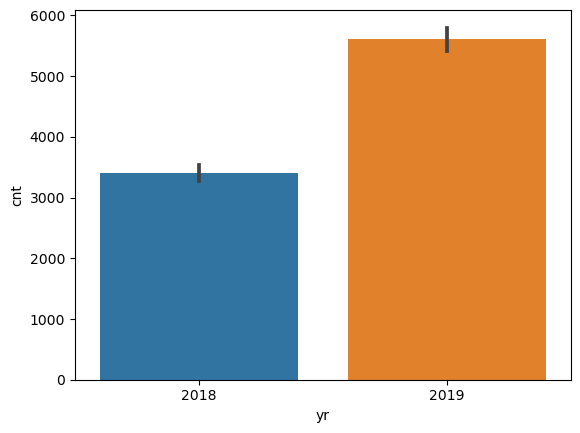

In [18]:
sns.barplot(data=bike_data, x= 'yr', y='cnt',estimator = np.mean)

##### Number of booking has been drastically increased in 2019 in comparison with 2018

<AxesSubplot:xlabel='season', ylabel='cnt'>

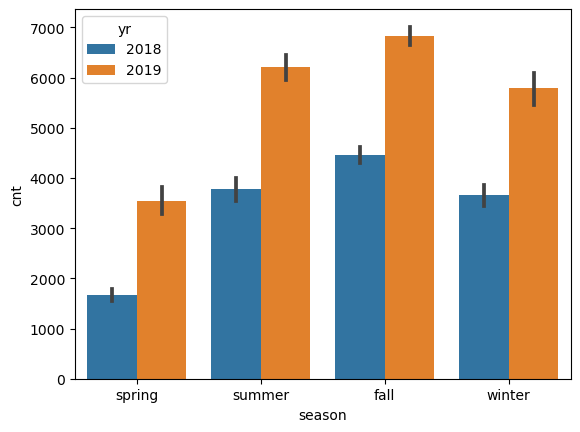

In [19]:
sns.barplot(data=bike_data, x= 'season', y='cnt',hue='yr',estimator = np.mean)

##### Most booking happens on Fall season 

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

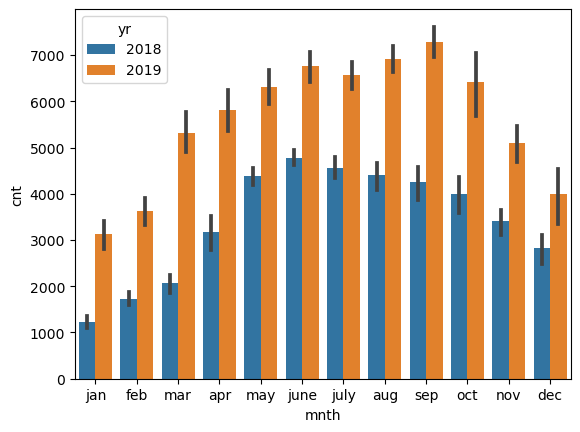

In [20]:
sns.barplot(data=bike_data, x= 'mnth', y='cnt',hue='yr',estimator = np.mean)

##### Booking trend increase from starting till mid year and then it started decreasing. This is the same trend in both years

<AxesSubplot:xlabel='holiday', ylabel='cnt'>

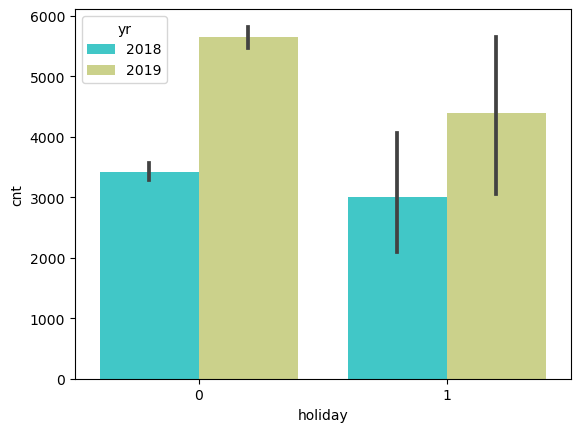

In [21]:
sns.barplot(data=bike_data, x= 'holiday', y='cnt',hue='yr',estimator = np.mean, palette = 'rainbow')

##### Demand is less on Holidays and is understandable

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

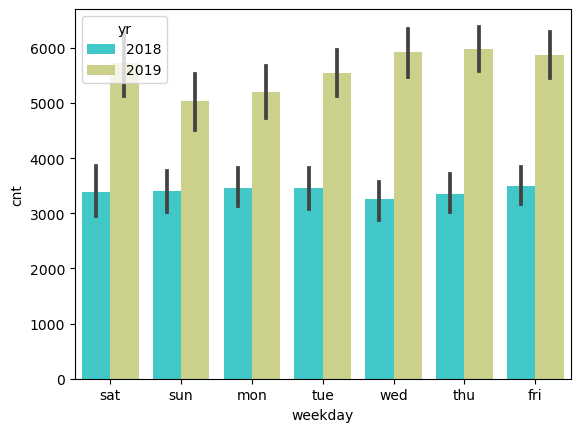

In [22]:
sns.barplot(data=bike_data, x= 'weekday', y='cnt',hue='yr',estimator = np.mean, palette = 'rainbow')

##### Looks like demand is more on days approaching weekends

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

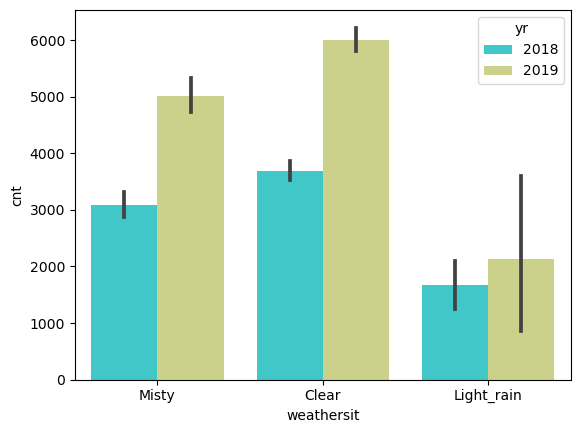

In [23]:
sns.barplot(data=bike_data, x= 'weathersit', y='cnt',hue='yr',estimator = np.mean, palette = 'rainbow')

#### Clear weather is having more booking in both years

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

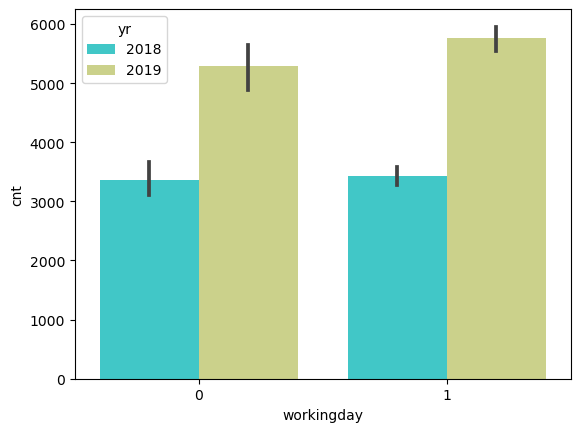

In [24]:
sns.barplot(data=bike_data, x= 'workingday', y='cnt',hue='yr',estimator = np.mean, palette = 'rainbow')

#### booking seems to be same on working day and non-working day

#### Plotting box plot to understand the distribution at a glance

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

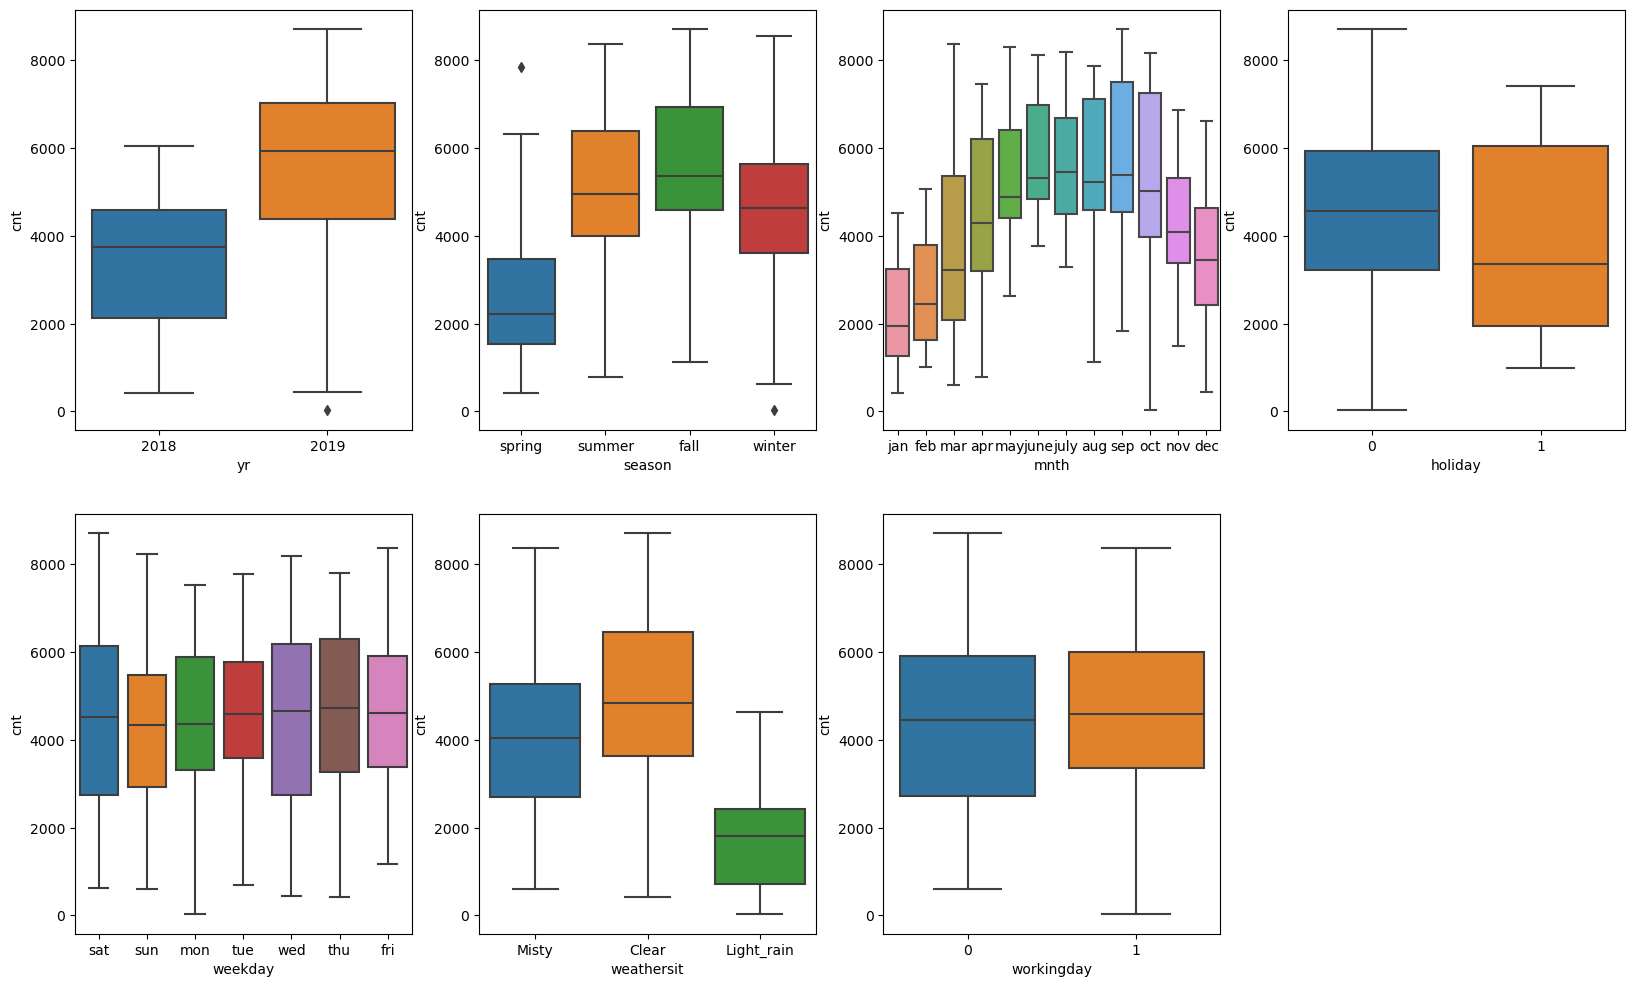

In [25]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x=bike_data.yr,y=bike_data.cnt)
plt.subplot(2,4,2)
sns.boxplot(x=bike_data.season,y=bike_data.cnt)
plt.subplot(2,4,3)
sns.boxplot(x=bike_data.mnth,y=bike_data.cnt)
plt.subplot(2,4,4)
sns.boxplot(x=bike_data.holiday,y=bike_data.cnt)
plt.subplot(2,4,5)
sns.boxplot(x=bike_data.weekday,y=bike_data.cnt)
plt.subplot(2,4,6)
sns.boxplot(x=bike_data.weathersit,y=bike_data.cnt)
plt.subplot(2,4,7)
sns.boxplot(x=bike_data.workingday,y=bike_data.cnt)

### Analyzing numerical columns

In [26]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [27]:
bike_data.corr()

,holiday,workingday,temp,atemp,hum,windspeed,cnt
holiday,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542
temp,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000


<AxesSubplot:>

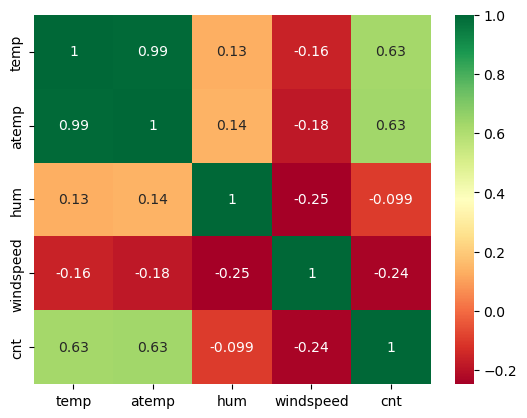

In [28]:
sns.heatmap(bike_data[['temp','atemp','hum','windspeed','cnt']].corr(),annot=True,cmap="RdYlGn")

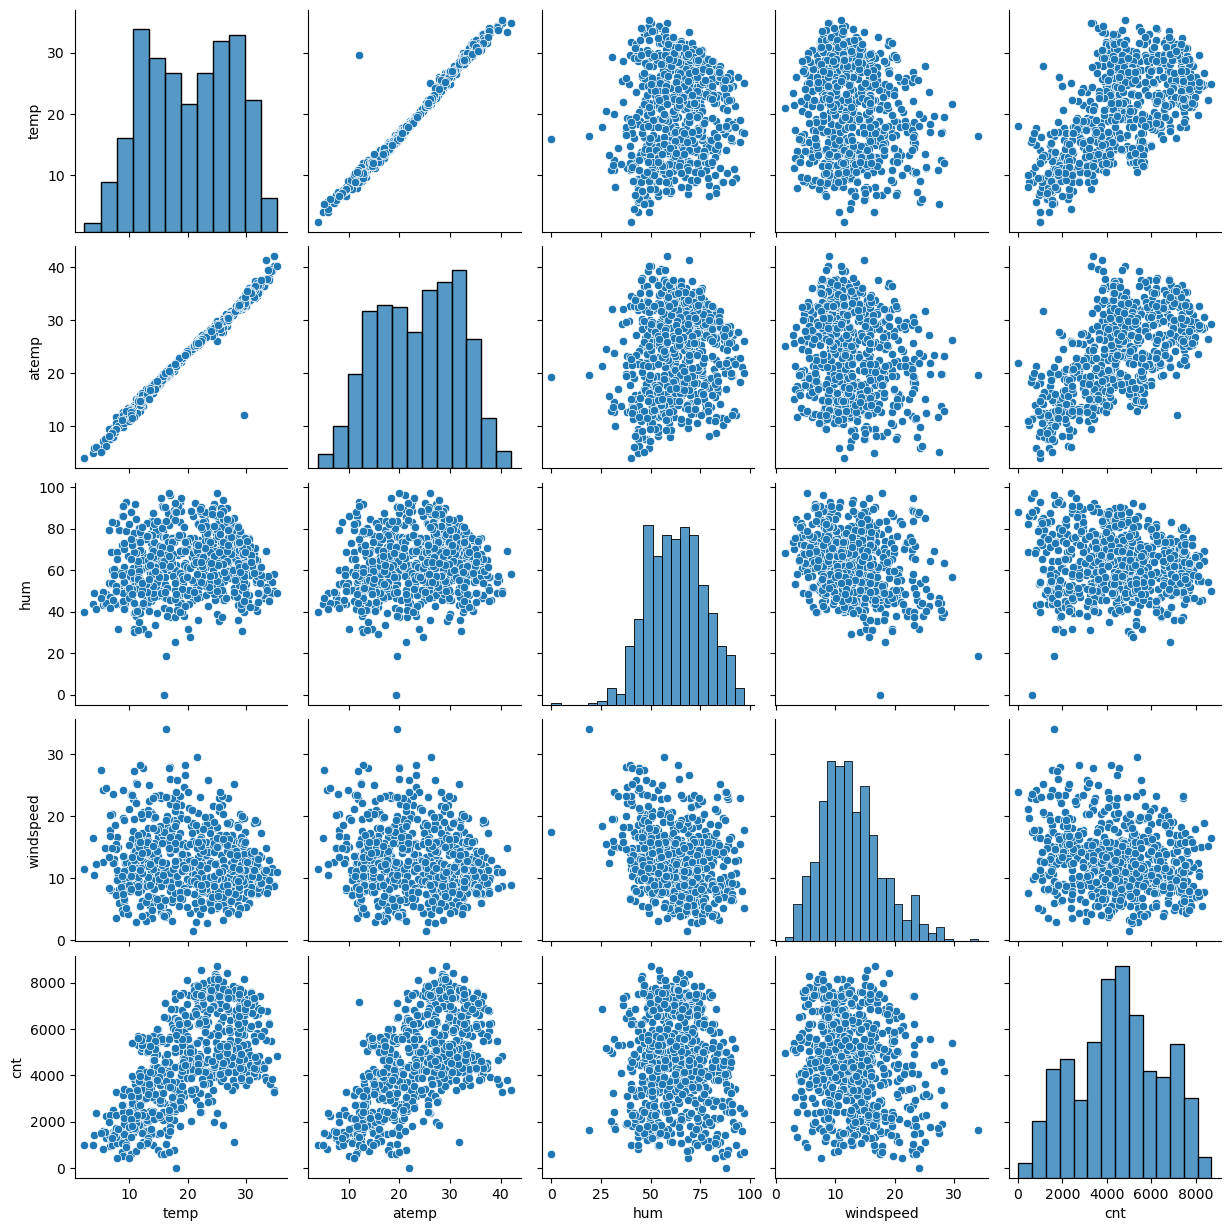

In [29]:
sns.pairplot(bike_data[['temp','atemp','hum','windspeed','cnt']])

#### There is a positive correlation between count and temp, count and atemp. Weak negative between count and humidity, count and windspeed. 


#### Multicollinearity exists between temp and atemp independent variables.

#### Confirming linear relationship between dependent variable and some of independent variables. This linear relationship is the prerequisite for using linear regression

<AxesSubplot:title={'center':'Temperature vs Count'}, xlabel='temp', ylabel='cnt'>

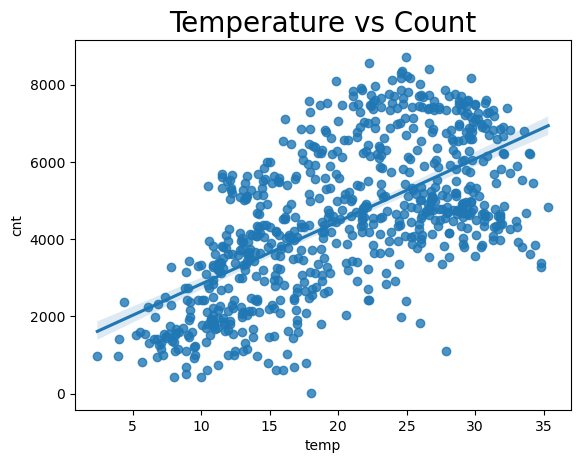

In [30]:
plt.title("Temperature vs Count", size=20)
sns.regplot(x='temp',y='cnt',data=bike_data)

#### Demand for bike is positively correlated with temperature

<AxesSubplot:title={'center':'Humidity vs Count'}, xlabel='hum', ylabel='cnt'>

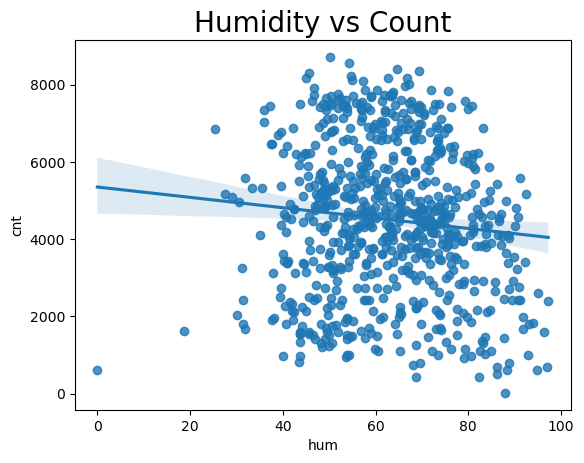

In [31]:
plt.title("Humidity vs Count", size=20)
sns.regplot(x='hum',y='cnt',data=bike_data)

#### Count is decreasing with increase in humidity

<AxesSubplot:title={'center':'Windspeed vs Count'}, xlabel='windspeed', ylabel='cnt'>

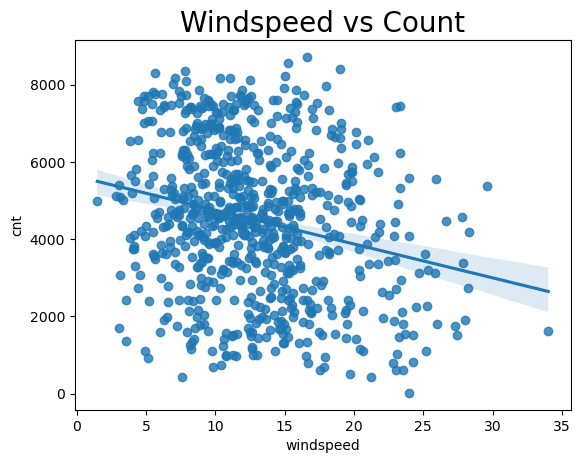

In [32]:
plt.title("Windspeed vs Count", size=20)
sns.regplot(x='windspeed',y='cnt',data=bike_data)

#### Count is decreasing with increase in windspeed

##  Data Preparation

In [33]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [34]:
bike_data.weathersit.value_counts()

Clear         463
Misty         246
Light_rain     21
Name: weathersit, dtype: int64

In [35]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 90.3+ KB


In [36]:
bike_data.yr = bike_data.yr.map({'2018':0,'2019':1})

In [37]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 90.3+ KB


#### Creating dummy for categorical variables

In [38]:
bike_data = pd.get_dummies(data=bike_data,columns=["season","mnth","weekday"],drop_first=True)
bike_data = pd.get_dummies(data=bike_data,columns=["weathersit"])

In [39]:
bike_data.shape

(730, 31)

In [40]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   temp                   730 non-null    float64
 4   atemp                  730 non-null    float64
 5   hum                    730 non-null    float64
 6   windspeed              730 non-null    float64
 7   cnt                    730 non-null    int64  
 8   season_spring          730 non-null    uint8  
 9   season_summer          730 non-null    uint8  
 10  season_winter          730 non-null    uint8  
 11  mnth_aug               730 non-null    uint8  
 12  mnth_dec               730 non-null    uint8  
 13  mnth_feb               730 non-null    uint8  
 14  mnth_jan               730 non-null    uint8  
 15  mnth_j

In [41]:
bike_data.shape

(730, 31)

## Splitting data into Train and Test

In [42]:
np.random.seed(0)
df_train, df_test = train_test_split(bike_data, train_size = 0.7, random_state = 100)

In [43]:
df_train.shape

(510, 31)

In [44]:
# Scaling
scaler = MinMaxScaler()

In [45]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light_rain,weathersit_Misty
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,1,0,1,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,1,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,1,0,0,0,0,0,0,1
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,1,...,0,0,0,0,0,0,0,0,0,1


In [46]:
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [47]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light_rain,weathersit_Misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,1,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,1,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,1,0,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


In [48]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light_rain,weathersit_Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.625490,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.484471,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

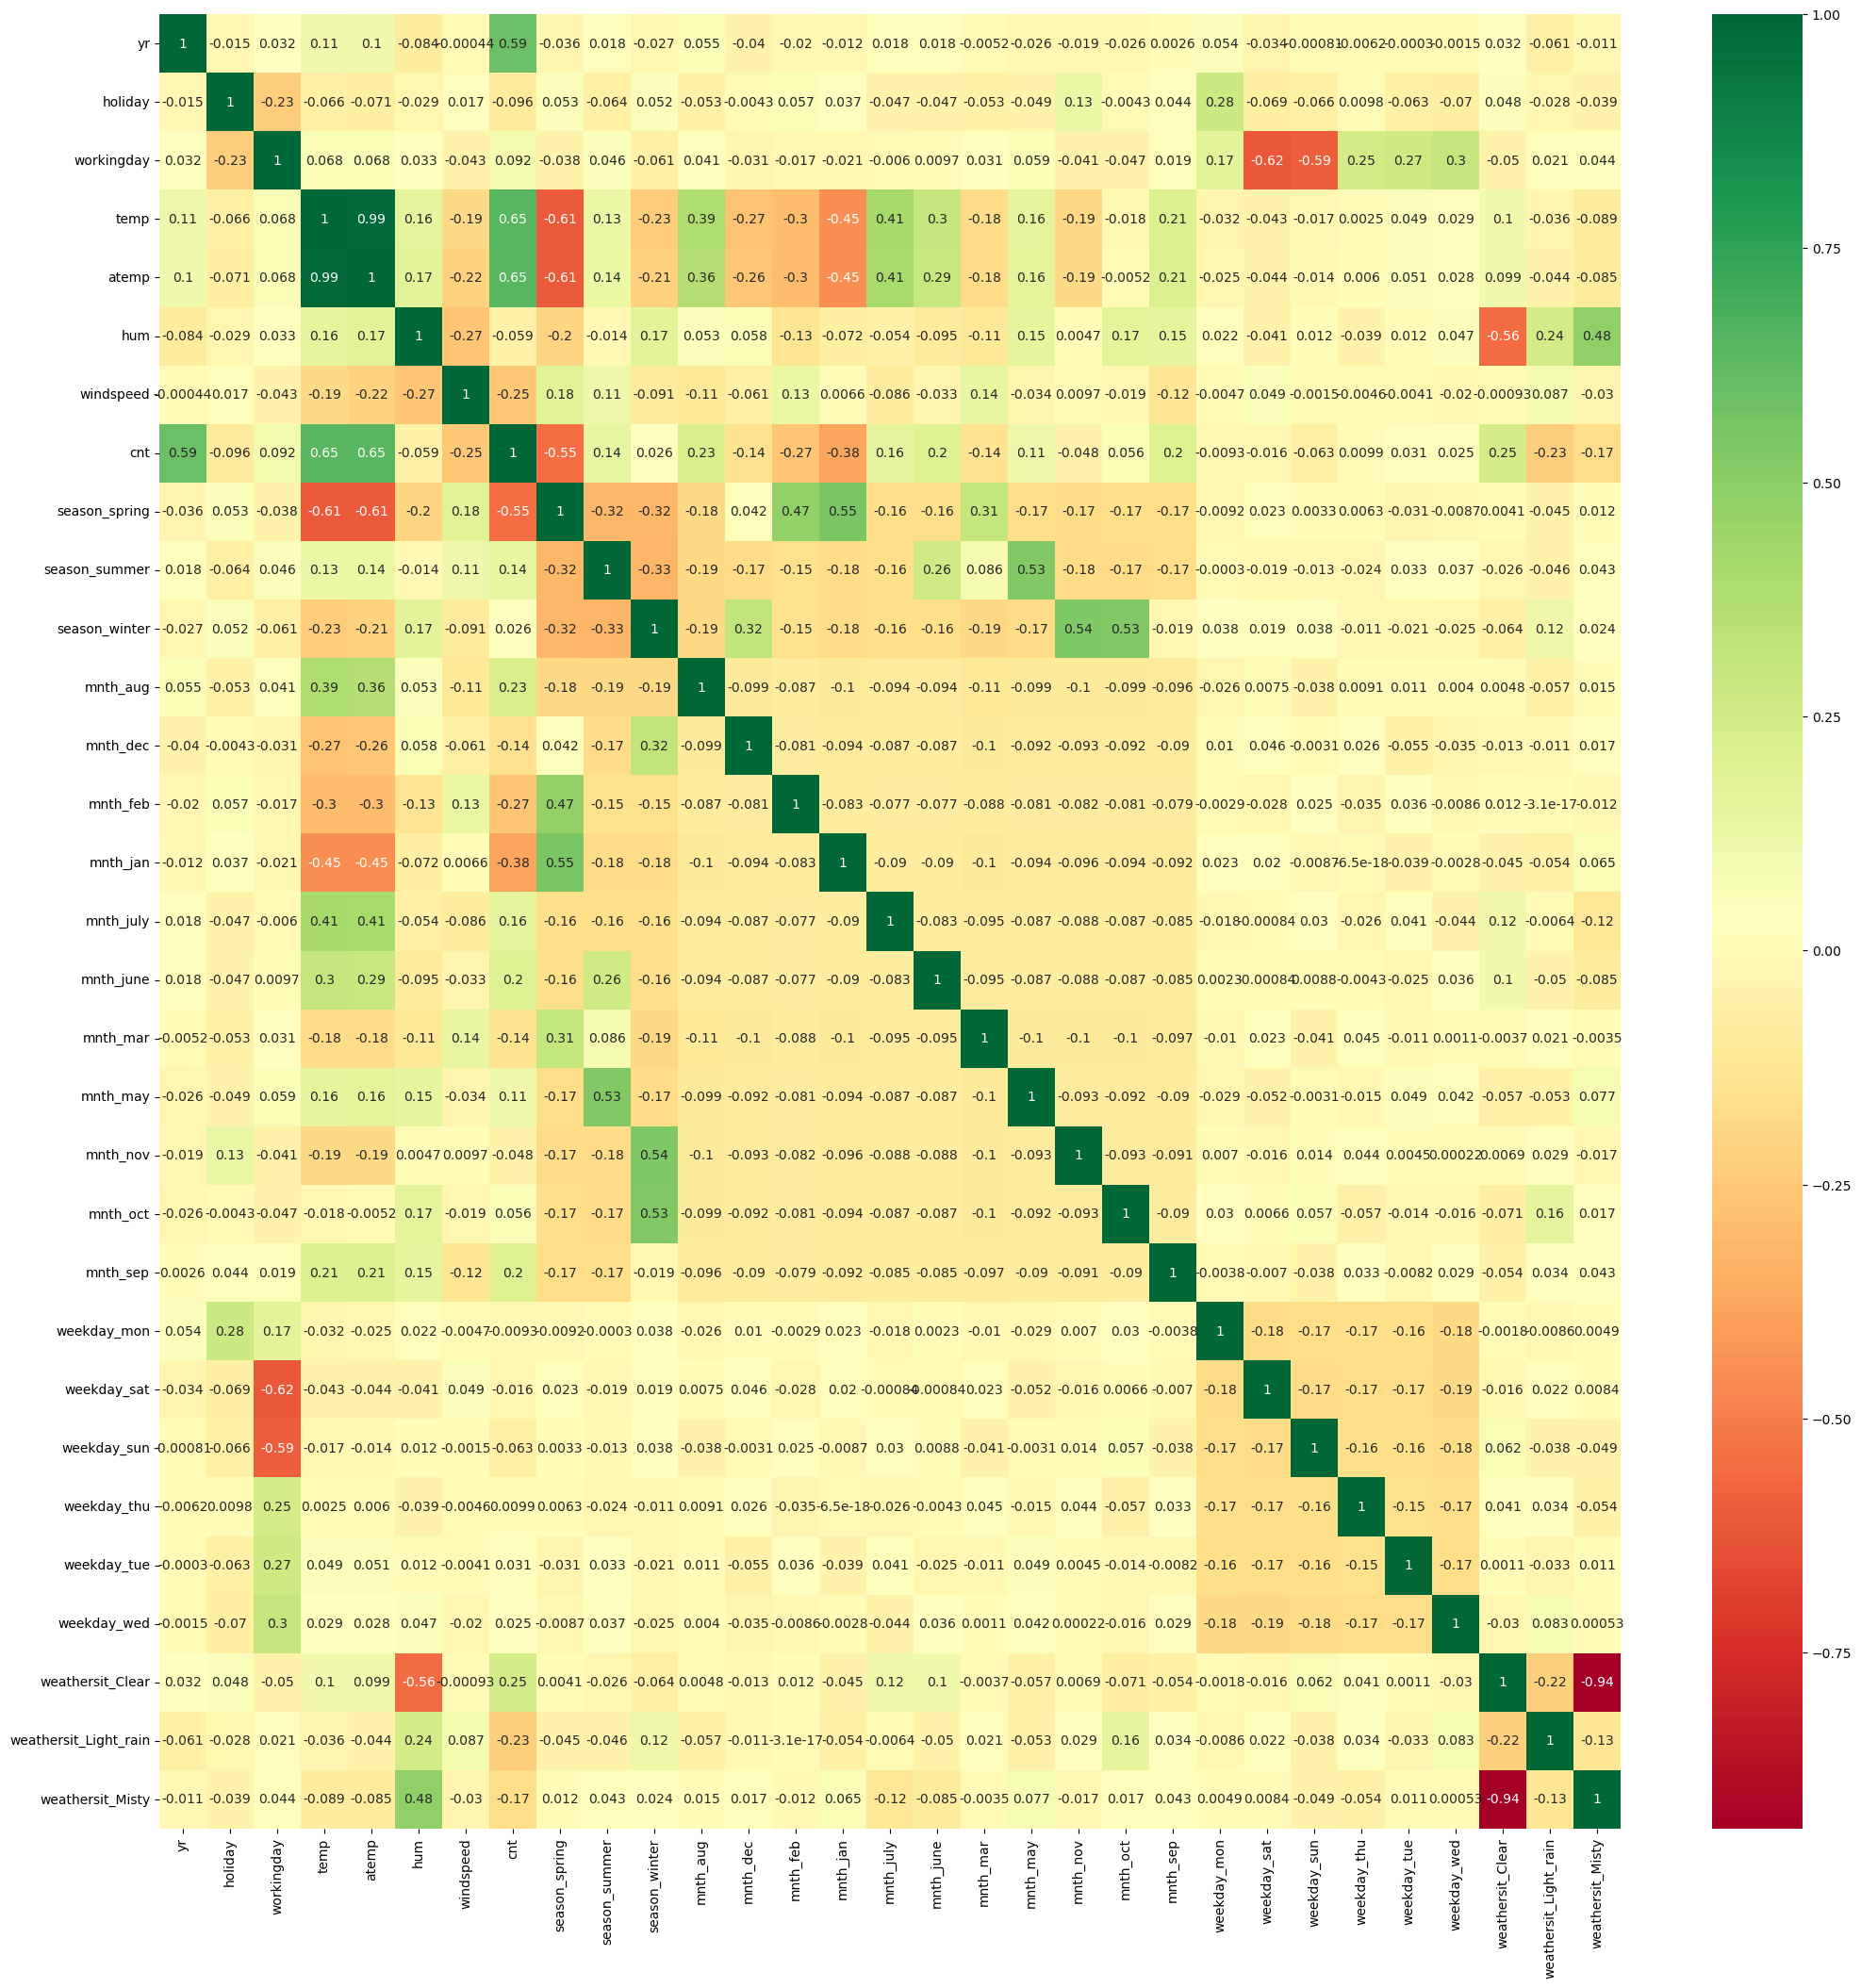

In [49]:
plt.figure(figsize = (25,25))
sns.heatmap(df_train.corr(),annot = True,cmap="RdYlGn")

#### 1. cnt is correlated to yr,temp and atemp
#### 2. Misty and humidity shows correlation
#### 3. Spring season correlated with Jan and Feb
#### 4. Summer is correlated with May
#### 5. Winter correlated with October and November

## Building model

In [50]:
y_train = df_train.pop('cnt')
X_train = df_train

### Recursive feature elimination

In [51]:
lm = LinearRegression()
lm.fit(X_train, y_train)

## Taking 15 predictors
rfe = RFE(lm, step = 15)
rfe = rfe.fit(X_train, y_train)

In [52]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 2),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 2),
 ('mnth_jan', True, 1),
 ('mnth_july', False, 2),
 ('mnth_june', False, 2),
 ('mnth_mar', False, 2),
 ('mnth_may', False, 2),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 2),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 2),
 ('weekday_sat', False, 2),
 ('weekday_sun', False, 2),
 ('weekday_thu', False, 2),
 ('weekday_tue', False, 2),
 ('weekday_wed', False, 2),
 ('weathersit_Clear', True, 1),
 ('weathersit_Light_rain', True, 1),
 ('weathersit_Misty', True, 1)]

In [53]:
# selecting RFE selected variables
cols = X_train.columns[rfe.support_]
print(cols)

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_sep',
       'weathersit_Clear', 'weathersit_Light_rain', 'weathersit_Misty'],
      dtype='object')


In [54]:
# Train data frame for selected variables

X_train_rfe = X_train[cols]

### Multicollinearity

In [55]:
def vif_cal(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif     

In [56]:
# Calculate VIF for selected variables

vif_cal(X_train_rfe)

,Features,VIF
2,temp,58.49
3,atemp,53.59
12,weathersit_Clear,48.67
14,weathersit_Misty,32.22
6,season_spring,4.99
13,weathersit_Light_rain,4.12
8,season_winter,3.51
7,season_summer,2.46
4,hum,1.92
10,mnth_jan,1.65


#### As expected temp and atemp are having high VIF

### Building Linear model with Stats

In [57]:
X_train_lm1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.6
Date:                Tue, 01 Nov 2022   Prob (F-statistic):          4.12e-187
Time:                        10:26:24   Log-Likelihood:                 507.38
No. Observations:                 510   AIC:                            -984.8
Df Residuals:                     495   BIC:                            -921.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.14

#### atemp variable is showing high P value. So we can remove that variable

In [58]:
X_train_new = X_train_rfe.drop(['atemp'], axis = 1)
vif_cal(X_train_new)

,Features,VIF
11,weathersit_Clear,48.65
13,weathersit_Misty,32.19
5,season_spring,4.91
12,weathersit_Light_rain,4.10
2,temp,4.03
7,season_winter,3.40
6,season_summer,2.37
3,hum,1.91
9,mnth_jan,1.65
8,mnth_dec,1.27


#### predictor temp is not showing high VIF now

In [59]:
X_train_lm2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.4
Date:                Tue, 01 Nov 2022   Prob (F-statistic):          2.86e-188
Time:                        10:26:24   Log-Likelihood:                 507.38
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     496   BIC:                            -927.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.14

In [60]:
# Removing mnth_dec as it is showing high P value

X_train_new = X_train_new.drop(['mnth_dec'], axis = 1)
vif_cal(X_train_new)


,Features,VIF
10,weathersit_Clear,47.43
12,weathersit_Misty,31.67
5,season_spring,4.89
11,weathersit_Light_rain,4.09
2,temp,3.79
7,season_winter,3.39
6,season_summer,2.32
3,hum,1.89
8,mnth_jan,1.56
4,windspeed,1.21


In [61]:
# Removing weathersit_Clear predictor as it is having high VIF
X_train_new = X_train_new.drop(['weathersit_Clear'], axis = 1)
vif_cal(X_train_new)

,Features,VIF
3,hum,29.01
2,temp,15.37
4,windspeed,4.65
5,season_spring,4.23
7,season_winter,3.22
6,season_summer,2.47
11,weathersit_Misty,2.28
0,yr,2.08
8,mnth_jan,1.66
9,mnth_sep,1.28


In [62]:
X_train_lm2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.7
Date:                Tue, 01 Nov 2022   Prob (F-statistic):          4.79e-189
Time:                        10:26:24   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.28

#### P values seem to be fine however humidity is having high VIF. We will remove humidity and check

In [63]:
# Removing hum(Humidity) predictor as it is having high VIF
X_train_new = X_train_new.drop(['hum'], axis = 1)
vif_cal(X_train_new)

,Features,VIF
3,windspeed,4.61
2,temp,3.85
4,season_spring,2.63
0,yr,2.07
5,season_summer,1.91
6,season_winter,1.63
7,mnth_jan,1.60
10,weathersit_Misty,1.56
8,mnth_sep,1.23
9,weathersit_Light_rain,1.08


In [64]:
X_train_lm2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.1
Date:                Tue, 01 Nov 2022   Prob (F-statistic):          1.96e-186
Time:                        10:26:24   Log-Likelihood:                 497.40
No. Observations:                 510   AIC:                            -970.8
Df Residuals:                     498   BIC:                            -920.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.20

#### Now both Pvalues and VIF look fine. Trying to optimize the model further by removing Jan

In [65]:
# Removing Jan predictor as it is having relatively high P value
X_train_new = X_train_new.drop(['mnth_jan'], axis = 1)
vif_cal(X_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,yr,2.07
4,season_spring,1.99
5,season_summer,1.90
6,season_winter,1.63
9,weathersit_Misty,1.55
7,mnth_sep,1.23
8,weathersit_Light_rain,1.08
1,holiday,1.04


In [66]:
X_train_lm2 = sm.add_constant(X_train_new)
lr_final = sm.OLS(y_train,X_train_lm2).fit()
print(lr_Final.summary())

NameError: name 'lr_Final' is not defined

## lr_final model is a robust model

#### 1. P values of all independent variables are very low hence all these variables are significant
#### 2. VIF of all variables are less than 5 which shows that very low multicollinearity
#### 3. F-Statistic value of the model is high which shows the overall robustness of the model 

### Error analysis for train data

In [ ]:
y_train_predict = lr_final.predict(X_train_lm2)

In [ ]:
plt.hist(y_train - y_train_predict)

In [ ]:
sns.distplot(y_train - y_train_predict)

#### Residuals are following normal distribution

#### As we already found out that VIF values are less than 5 and it shows multicollinearity is not at a dangerous level

In [ ]:
vif_cal(X_train_new)

#### Homoskedasticity

In [ ]:
sns.regplot(x=y_train, y=y_train_predict)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

#### Residual Variance are equally distributed and it is depicted in above grpah. There is no high concentration of data points

## Predictions on Test data

In [ ]:
# Scale Test Data set

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

In [ ]:
y_test = df_test.pop('cnt')
X_test = df_test

In [ ]:
cols = X_train_new.columns

X_test = X_test[cols]

# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)

In [ ]:
y_pred = lr_final.predict(X_test_lm)

In [ ]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

## Model Validation

In [ ]:
sns.regplot(x=y_test, y=y_pred)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

In [ ]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

## R2 value on the test data set is 0.8038
## Adjusted R2 value on the test data set is 0.7944

## General principle as per Occam's Razor is to have a simple model to solve a problem. Our model's Adjusted R2 value justifies the idea of having a simple model